In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\Mall_Customers.csv")
print(df.shape)
df.head()

(250, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
## Extracting the independent variables
x = df.iloc[:, [3, 4]]

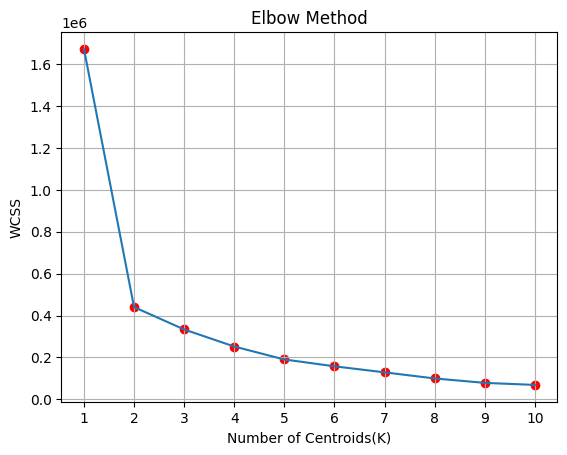

In [39]:
wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.scatter(range(1, 11), wcss, c='red', marker='o')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title('Elbow Method')
plt.xlabel("Number of Centroids(K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [22]:
## so number of clusters will be 5

In [23]:
km = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred = km.fit_predict(x)

In [36]:
y_pred_df = pd.DataFrame(y_pred, columns=['Cluster'])
print(y_pred_df['Cluster'].unique())
y_pred_df.head()

[3 0 2 4 1]


,Cluster
0,3
1,3
2,3
3,3
4,3


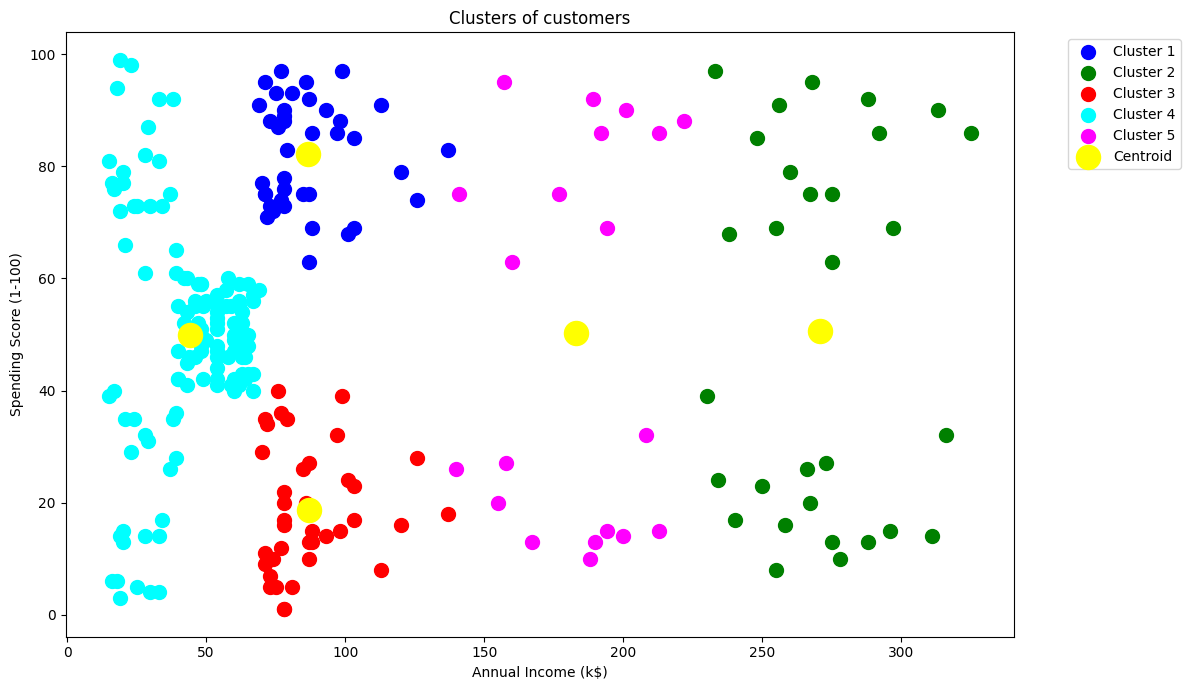

In [33]:
plt.figure(figsize=(12, 7))
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
for k in range(5):
    plt.scatter(x.values[y_pred == k, 0], x.values[y_pred == k, 1], s = 100, c = colors[k], label = f'Cluster {k+1}')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()  